In [6]:
import numpy as np
from datascience import *
import d8error

import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import math

In [7]:
cyanide = Table.read_table('Cyanide.csv')
enzyme = Table.read_table('Linamarase.csv')
sugar = Table.read_table('Linamarin.csv')
none = Table.read_table('Nothing.csv')
clovers = [cyanide, enzyme, sugar, none]
light_level = make_array()
mowing_height = make_array()
moisture = make_array()
surface_temp = make_array()
cn_ll = make_array()
cn_mh = make_array()
cn_m = make_array()
cn_st = make_array()
ncn_ll = make_array()
ncn_mh = make_array()
ncn_m = make_array()
ncn_st = make_array()
for tab in clovers:
    light_level = np.append(light_level, np.mean(tab.column(1)))
    mowing_height = np.append(mowing_height, np.mean(tab.column(2)))
    moisture = np.append(moisture, np.mean(tab.column(3)))
    surface_temp = np.append(surface_temp, np.mean(tab.column(4)))
    if not tab == cyanide:
        ncn_ll = np.append(ncn_ll, tab.column(1))
        ncn_mh = np.append(ncn_mh, tab.column(2))
        ncn_m = np.append(ncn_m, tab.column(3))
        ncn_st = np.append(ncn_st, tab.column(4))
summary = Table().with_columns('Type', make_array('Cyanide Producers', 'Linamarase Producers', 'Linamarin Producers', 'Nothing Producers'),
                              'Light Level (lux)', light_level,
                              'Mowing Height (cm)', mowing_height,
                               'Soil Moisture', moisture,
                              'Surface Temperature (C)', surface_temp)
cyanide = cyanide.drop('Plant number')
non_cyanide = Table().with_columns('Light Level (lux)', ncn_ll,
                                  'Mowing Height (cm)', ncn_mh,
                                   'Soil Moisture', ncn_m,
                                  'Surface Temperature (C)', ncn_st)
cyanide.show(2)
non_cyanide.show(2)
cn = cyanide
ncn = non_cyanide
summary

Light Level (lux),Mowing height (cm),Soil Moisture,Surface Temperature (C)
984,3.75,10,39.75
715.25,5,10,38.5


Light Level (lux),Mowing Height (cm),Soil Moisture,Surface Temperature (C)
388,13,6,19.2
782,4,10,29.7


Type,Light Level (lux),Mowing Height (cm),Soil Moisture,Surface Temperature (C)
Cyanide Producers,504.156,9.24393,7.50357,25.1071
Linamarase Producers,703.958,6.77031,6.90312,26.42
Linamarin Producers,267.625,4,3.875,22.175
Non-Producers,411.417,5.72083,3.50833,30.0667


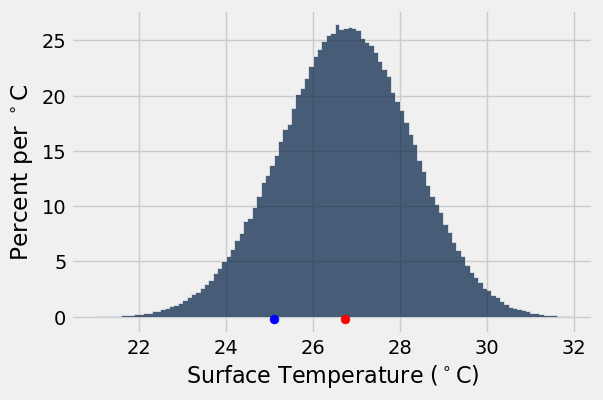

In [23]:
ncn_sts = make_array()
for i in range(500000):
    sample_stat = np.mean(non_cyanide.sample(non_cyanide.num_rows).column(3))
    ncn_sts = np.append(ncn_sts, sample_stat)
ncn_sts = Table().with_column('Surface Temperature', ncn_sts)
ncn_sts.hist(bins = np.arange(21, 32, 0.1), unit = '$^\circ$C')
plt.scatter(np.mean(ncn.column(3)), -0.002, color='red', s=40)
plt.scatter(np.mean(cn.column(3)), -0.002, color='blue', s=40)

In [22]:
print(np.count_nonzero((abs(ncn_sts.column(0) - np.mean(ncn.column(3))) >= abs(np.mean(ncn.column(3))-np.mean(cn.column(3)))))/len(ncn_sts.column(0)))

0.28597


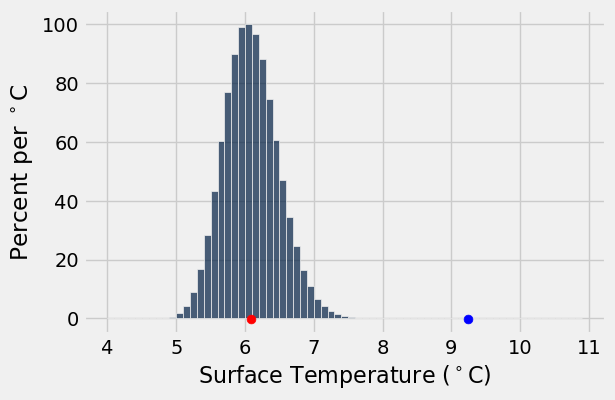

In [26]:
ncn_mhs = make_array()
for i in range(500000):
    sample_stat = np.mean(non_cyanide.sample(non_cyanide.num_rows).column(1))
    ncn_mhs = np.append(ncn_mhs, sample_stat)
ncn_mhs = Table().with_column('Surface Temperature', ncn_mhs)
ncn_mhs.hist(bins = np.arange(4, 11, 0.1), unit = '$^\circ$C')
plt.scatter(np.mean(ncn.column(1)), -0.002, color='red', s=40)
plt.scatter(np.mean(cn.column(1)), -0.002, color='blue', s=40)

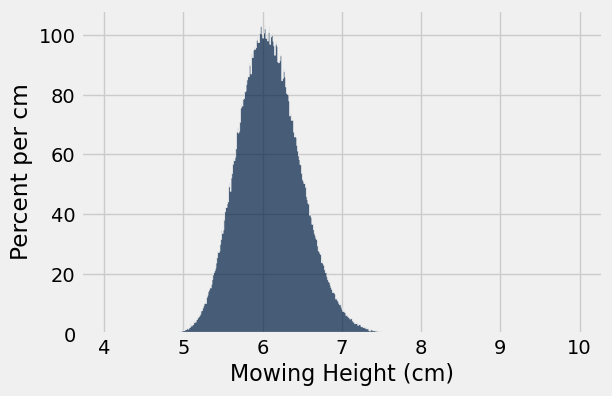

In [27]:
ncn_mhs = ncn_mhs.relabeled('Surface Temperature', 'Mowing Height')
ncn_mhs.hist(bins = np.arange(4, 10, 0.01), unit = 'cm')

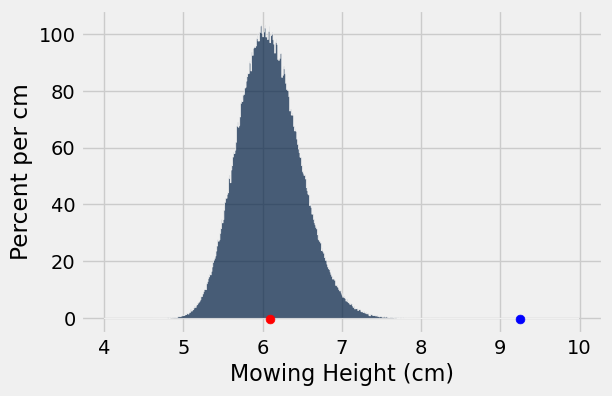

In [28]:
ncn_mhs.hist(bins = np.arange(4, 10, 0.01), unit = 'cm')
plt.scatter(np.mean(ncn.column(1)), -0.002, color='red', s=40)
plt.scatter(np.mean(cn.column(1)), -0.002, color='blue', s=40)

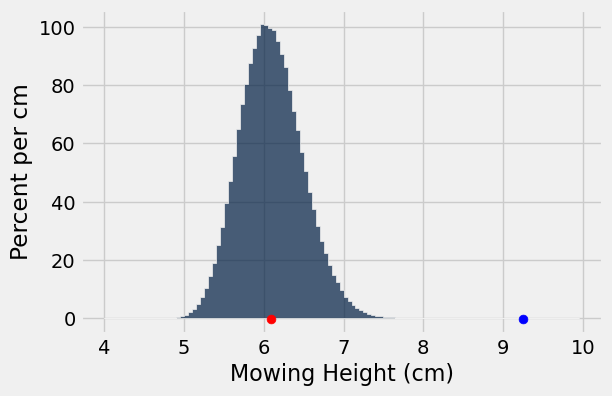

In [30]:
ncn_mhs.hist(bins = np.arange(4, 10, 0.05), unit = 'cm')
plt.scatter(np.mean(ncn.column(1)), -0.002, color='red', s=40)
plt.scatter(np.mean(cn.column(1)), -0.002, color='blue', s=40)

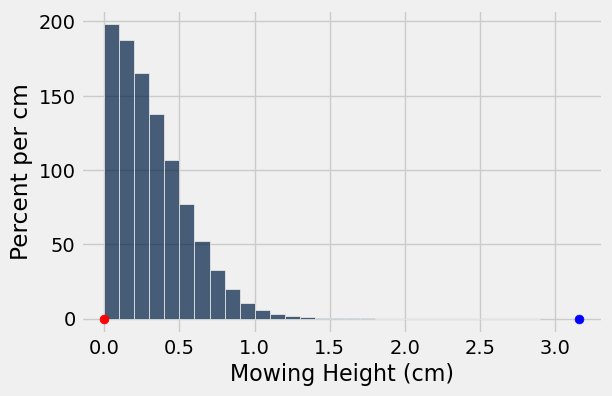

In [40]:
ncn_mhs2 = Table().with_column('Mowing Height', abs(ncn_mhs.column(0)-np.mean(ncn.column(1))))
ncn_mhs2.hist(bins = np.arange(0, 3, 0.1), unit = 'cm')
plt.scatter(0, -0.002, color='red', s=40)
plt.scatter(abs(np.mean(cn.column(1))-np.mean(ncn.column(1))), -0.002, color='blue', s=40)

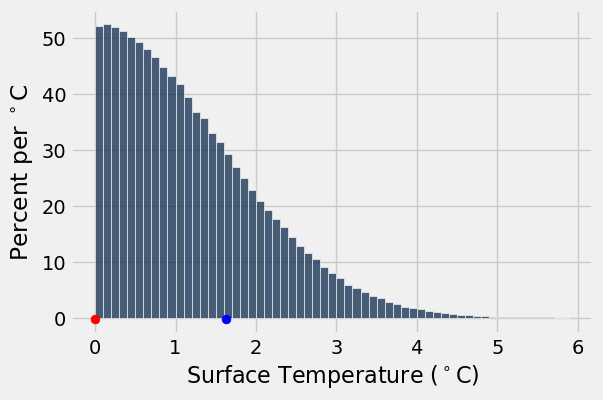

In [45]:
ncn_sts2 = Table().with_column('Surface Temperature', abs(ncn_sts.column(0)-np.mean(ncn.column(3))))
ncn_sts2.hist(bins = np.arange(0, 6, 0.1), unit = '$^\circ$C')
plt.scatter(0, -0.002, color='red', s=40)
plt.scatter(abs(np.mean(cn.column(3))-np.mean(ncn.column(3))), -0.002, color='blue', s=40)